# Analyse der Zeitreihe für die Microsoft Aktie
### Berechnung der Autokorrelation 1. Ordnung und Autokorrelation 2. Ordnung

In [6]:
# Notwendige Bibliotheken importieren
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import acf

# Daten einlesen
# Passe den Dateipfad entsprechend an
df = pd.read_csv('/Users/kaihufnagel/Documents/BBA/6. Semester/SP BBA/Menden/THWS_Reihenanalysen/data/microsoft_aktien_daten.csv')

# Datum als Index setzen
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Schlusskurse extrahieren
close_prices = df['Close']

# Berechne Autokorrelation für den originalen Schlusskurs
acf_values = acf(close_prices, nlags=2)

# Ausgabe der Autokorrelationen 1. und 2. Ordnung
print("\nAutokorrelation für originale Zeitreihe (Schlusskurs):")
print("1. Ordnung:", round(acf_values[1], 4))
print("2. Ordnung:", round(acf_values[2], 4))

# Berechne erste Differenz der Schlusskurse
close_diff1 = close_prices.diff().dropna()

# Berechne Autokorrelation für die erste Differenz
acf_diff1 = acf(close_diff1, nlags=2)

# Ausgabe der Autokorrelationen 1. und 2. Ordnung für die erste Differenz
print("\nAutokorrelation für erste Differenz des Schlusskurses:")
print("1. Ordnung:", round(acf_diff1[1], 4))
print("2. Ordnung:", round(acf_diff1[2], 4))


Autokorrelation für originale Zeitreihe (Schlusskurs):
1. Ordnung: 0.9956
2. Ordnung: 0.9916

Autokorrelation für erste Differenz des Schlusskurses:
1. Ordnung: -0.0294
2. Ordnung: -0.0433


/var/folders/mh/m6ml4k8j6w55wxl7hvpbxks00000gn/T/ipykernel_77496/1649108336.py:11: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Date'] = pd.to_datetime(df['Date'])


### Transformation der Zeitreihe für Erfüllung der Bedingungen für schwache Stationarität

/var/folders/mh/m6ml4k8j6w55wxl7hvpbxks00000gn/T/ipykernel_77496/3885700905.py:10: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Date'] = pd.to_datetime(df['Date'])


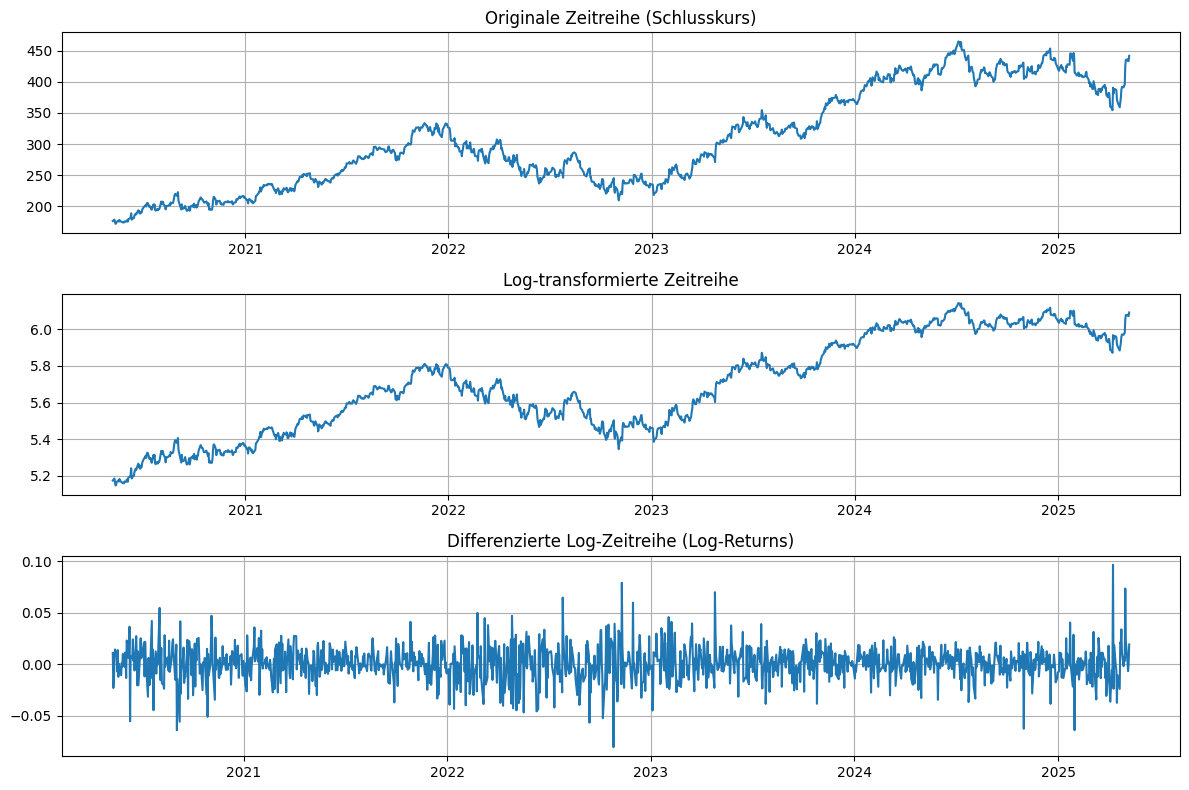

Originale Zeitreihe:
Mittelwert: 305.45
Standardabweichung: 78.51
Schiefe: 0.30
Kurtosis: -1.17

Log-transformierte Zeitreihe:
Mittelwert: 5.69
Standardabweichung: 0.26
Schiefe: -0.01
Kurtosis: -1.13

Differenzierte Log-Zeitreihe (Log-Returns):
Mittelwert: 0.00073
Standardabweichung: 0.01710
Schiefe: nan
Kurtosis: nan

Prüfung auf Stationarität für originale Zeitreihe:


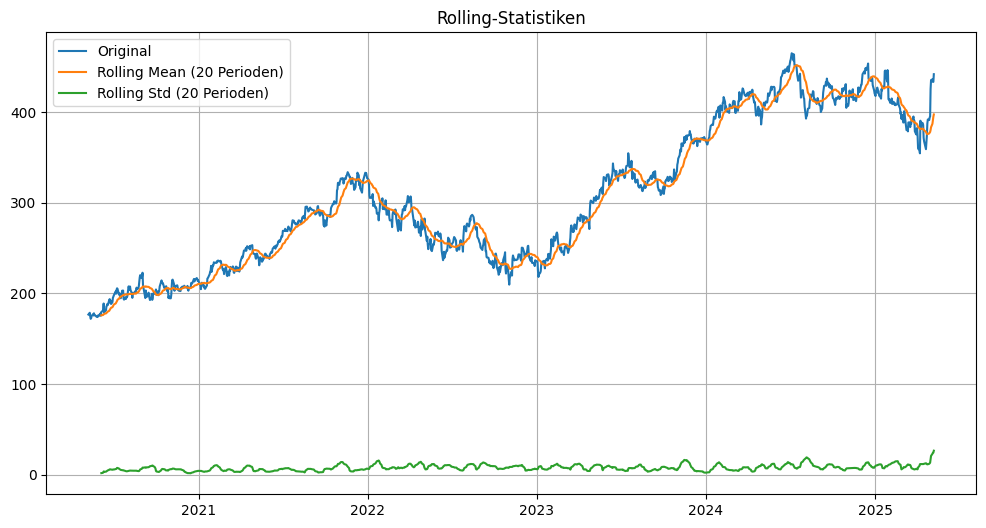

Autokorrelation 1. Ordnung: 0.9956
Autokorrelation 2. Ordnung: 0.9916

Prüfung auf Stationarität für log-transformierte Zeitreihe:


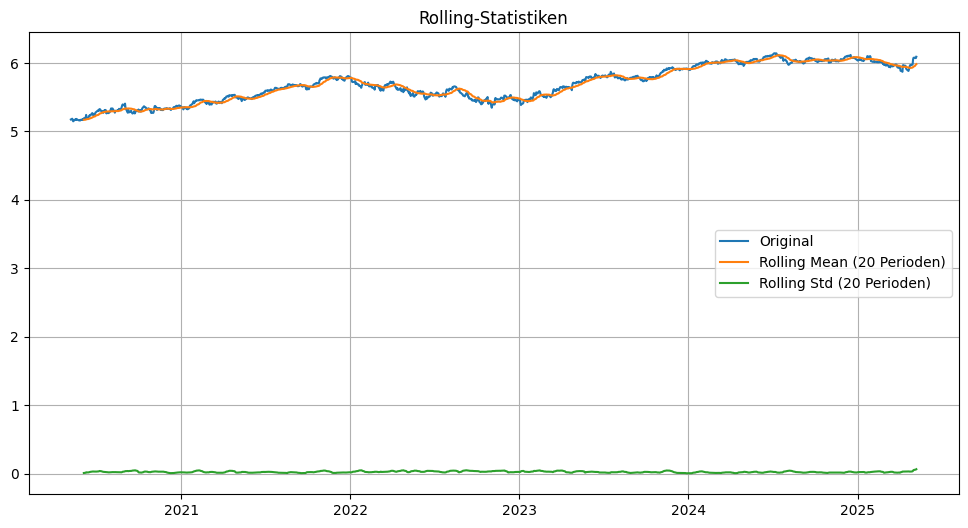

Autokorrelation 1. Ordnung: 0.9953
Autokorrelation 2. Ordnung: 0.9909

Prüfung auf Stationarität für differenzierte log-transformierte Zeitreihe:


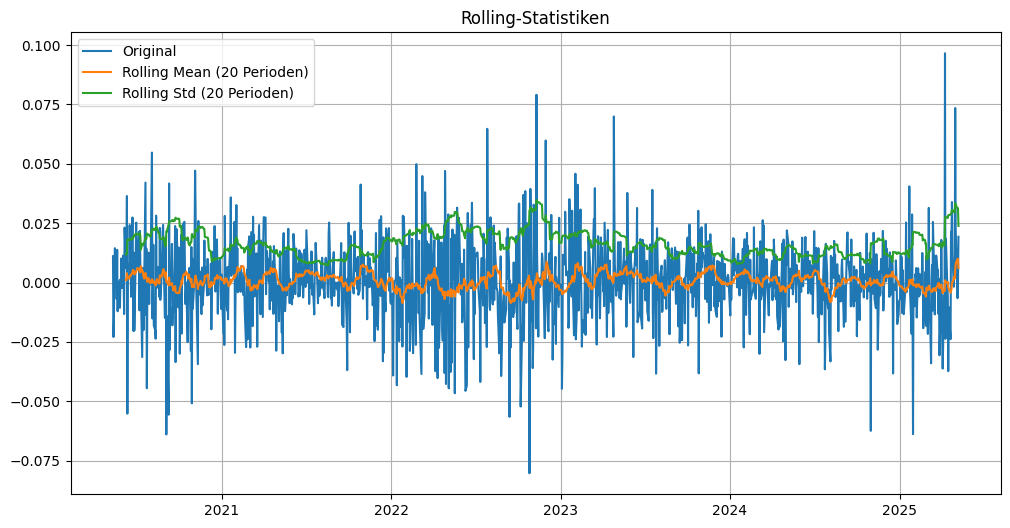

Autokorrelation 1. Ordnung: -0.0364
Autokorrelation 2. Ordnung: -0.0471


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Daten einlesen
df = pd.read_csv('/Users/kaihufnagel/Documents/BBA/6. Semester/SP BBA/Menden/THWS_Reihenanalysen/data/microsoft_aktien_daten.csv')

# Datum als Index setzen
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Originale Zeitreihe plotten
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(df['Close'])
plt.title('Originale Zeitreihe (Schlusskurs)')
plt.grid(True)

# 1. Transformation: Logarithmieren (für konstante Varianz)
# Diese Transformation ist oft sinnvoll bei Finanzzeitreihen, da sie prozentuale
# Änderungen statt absoluter Änderungen betrachtet
df['log_close'] = np.log(df['Close'])
plt.subplot(3, 1, 2)
plt.plot(df['log_close'])
plt.title('Log-transformierte Zeitreihe')
plt.grid(True)

# 2. Transformation: Differenzieren (für konstanten Mittelwert)
# Dies entfernt Trends und macht die Zeitreihe oft stationär
df['diff_log_close'] = df['log_close'].diff().dropna()
plt.subplot(3, 1, 3)
plt.plot(df['diff_log_close'])
plt.title('Differenzierte Log-Zeitreihe (Log-Returns)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Deskriptive Statistik für jede Transformation
print("Originale Zeitreihe:")
print(f"Mittelwert: {df['Close'].mean():.2f}")
print(f"Standardabweichung: {df['Close'].std():.2f}")
print(f"Schiefe: {stats.skew(df['Close']):.2f}")
print(f"Kurtosis: {stats.kurtosis(df['Close']):.2f}\n")

print("Log-transformierte Zeitreihe:")
print(f"Mittelwert: {df['log_close'].mean():.2f}")
print(f"Standardabweichung: {df['log_close'].std():.2f}")
print(f"Schiefe: {stats.skew(df['log_close']):.2f}")
print(f"Kurtosis: {stats.kurtosis(df['log_close']):.2f}\n")

print("Differenzierte Log-Zeitreihe (Log-Returns):")
print(f"Mittelwert: {df['diff_log_close'].mean():.5f}")
print(f"Standardabweichung: {df['diff_log_close'].std():.5f}")
print(f"Schiefe: {stats.skew(df['diff_log_close']):.2f}")
print(f"Kurtosis: {stats.kurtosis(df['diff_log_close']):.2f}\n")

# Einfache Prüfung auf Stationarität mit Rolling-Statistiken
def check_stationarity(timeseries, window=20):
    # Rolling-Statistiken
    rolling_mean = timeseries.rolling(window=window).mean()
    rolling_std = timeseries.rolling(window=window).std()
    
    # Plot der Rolling-Statistiken
    plt.figure(figsize=(12, 6))
    plt.plot(timeseries, label='Original')
    plt.plot(rolling_mean, label=f'Rolling Mean ({window} Perioden)')
    plt.plot(rolling_std, label=f'Rolling Std ({window} Perioden)')
    plt.legend()
    plt.title('Rolling-Statistiken')
    plt.grid(True)
    plt.show()
    
    # Manuelle Berechnung der Autokorrelation
    def autocorrelation(x, lag):
        x = x.dropna().values
        n = len(x)
        mean = np.mean(x)
        var = np.sum((x - mean) ** 2)
        acov = np.sum((x[lag:] - mean) * (x[:n-lag] - mean))
        return acov / var
    
    # Autokorrelation 1. und 2. Ordnung
    ac1 = autocorrelation(timeseries, 1)
    ac2 = autocorrelation(timeseries, 2)
    
    print(f"Autokorrelation 1. Ordnung: {ac1:.4f}")
    print(f"Autokorrelation 2. Ordnung: {ac2:.4f}")

print("Prüfung auf Stationarität für originale Zeitreihe:")
check_stationarity(df['Close'])

print("\nPrüfung auf Stationarität für log-transformierte Zeitreihe:")
check_stationarity(df['log_close'])

print("\nPrüfung auf Stationarität für differenzierte log-transformierte Zeitreihe:")
check_stationarity(df['diff_log_close'])

### Berechnung von ACF und PACF

/var/folders/mh/m6ml4k8j6w55wxl7hvpbxks00000gn/T/ipykernel_77496/2208043068.py:9: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Date'] = pd.to_datetime(df['Date'])


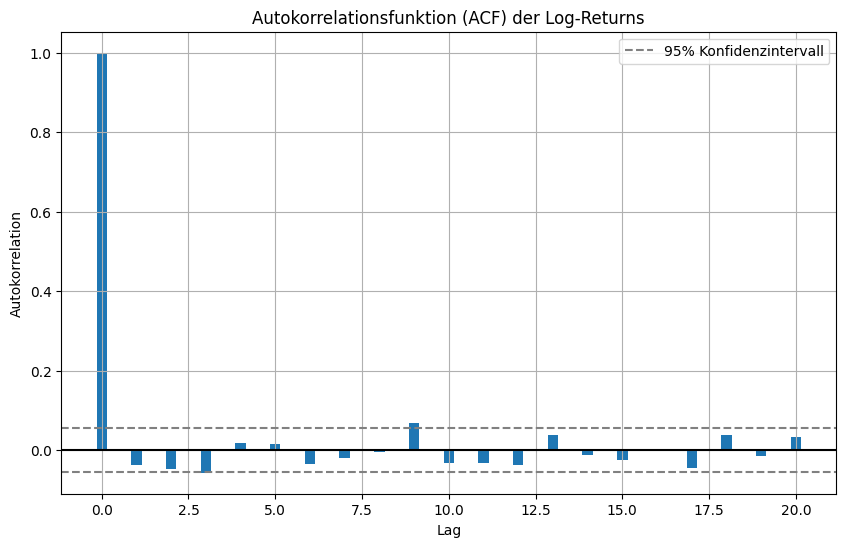

Lag	ACF
---------------
1	-0.0364 
2	-0.0472 
3	-0.0569 *
4	0.0176 
5	0.0158 
6	-0.0355 
7	-0.0199 
8	-0.0050 
9	0.0681 *
10	-0.0318 
11	-0.0335 
12	-0.0376 
13	0.0374 
14	-0.0132 
15	-0.0244 
16	-0.0027 
17	-0.0446 
18	0.0372 
19	-0.0139 
20	0.0331 

* signifikant auf 5%-Niveau


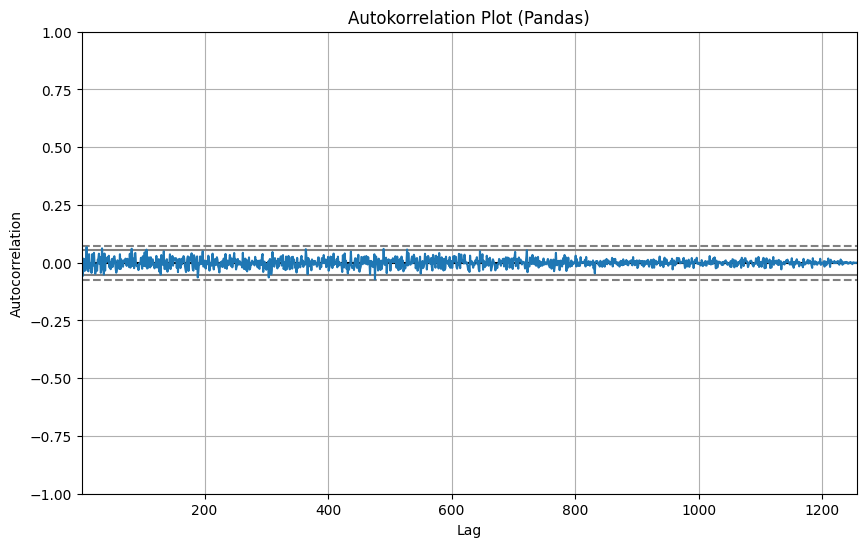

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Daten einlesen
df = pd.read_csv('/Users/kaihufnagel/Documents/BBA/6. Semester/SP BBA/Menden/THWS_Reihenanalysen/data/microsoft_aktien_daten.csv')

# Datum als Index setzen
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Transformieren zu log-returns (differenzierte logarithmierte Preise)
df['log_return'] = np.log(df['Close']).diff().dropna()

# ACF Berechnung
def compute_acf(x, nlags=20):
    """Berechnet die Autokorrelationsfunktion für die Lags 0 bis nlags"""
    x = np.array(x)
    n = len(x)
    mean = np.mean(x)
    
    # Normalisierte Zeitreihe
    x_norm = x - mean
    
    # Varianz (für Lag 0)
    var = np.sum(x_norm**2) / n
    
    # Initialisiere ACF-Array
    acf = np.zeros(nlags + 1)
    acf[0] = 1.0  # Lag 0 ist immer 1
    
    # Berechne ACF für Lags 1 bis nlags
    for lag in range(1, nlags + 1):
        acf[lag] = np.sum(x_norm[lag:] * x_norm[:n-lag]) / ((n-lag) * var)
    
    return acf

# Berechne einfach nur die Autokorrelationen
log_returns = df['log_return'].dropna().values
acf_values = compute_acf(log_returns, nlags=20)

# Konfidenzintervalle berechnen (95%)
n = len(log_returns)
conf_interval = 1.96 / np.sqrt(n)

# ACF plotten
plt.figure(figsize=(10, 6))
lags = range(len(acf_values))
plt.bar(lags, acf_values, width=0.3)
plt.axhline(y=0, linestyle='-', color='black')
plt.axhline(y=conf_interval, linestyle='--', color='gray', label='95% Konfidenzintervall')
plt.axhline(y=-conf_interval, linestyle='--', color='gray')
plt.title('Autokorrelationsfunktion (ACF) der Log-Returns')
plt.xlabel('Lag')
plt.ylabel('Autokorrelation')
plt.grid(True)
plt.legend()
plt.show()

# Tabellarische Ausgabe der ACF-Werte
print("Lag\tACF")
print("-" * 15)
for i in range(1, 21):  # Lags 1-20 anzeigen
    significant = abs(acf_values[i]) > conf_interval
    marker = "*" if significant else ""
    print(f"{i}\t{acf_values[i]:.4f} {marker}")
print("\n* signifikant auf 5%-Niveau")

# Alternativ: Verwende Pandas für die einfache PACF Berechnung
# Da die manuelle PACF-Berechnung komplizierter ist
try:
    from pandas.plotting import autocorrelation_plot
    plt.figure(figsize=(10, 6))
    autocorrelation_plot(df['log_return'].dropna())
    plt.title('Autokorrelation Plot (Pandas)')
    plt.grid(True)
    plt.show()
except ImportError:
    print("Pandas autocorrelation_plot nicht verfügbar.")

## ARIMA-Model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import itertools
import warnings

class LogARIMAModeler:
    def __init__(self, csv_file, column='Close'):
        """
        Initialisiert den ARIMA-Modellierer mit log-transformierten Daten aus einer CSV-Datei.
        
        Args:
            csv_file (str): Pfad zur CSV-Datei
            column (str): Zu analysierende Spalte (Standard: 'Close')
        """
        self.column = column
        self.data = None
        self.original_series = None
        self.time_series = None  # Wird die log-transformierte Zeitreihe enthalten
        self.best_model = None
        self.best_order = None
        
        # Warnungen unterdrücken
        warnings.filterwarnings('ignore')
        
        # Daten laden
        print(f"Lade Daten aus {csv_file}...")
        self.data = pd.read_csv(csv_file)
        
        # Index-Behandlung
        if 'Date' in self.data.columns:
            self.data['Date'] = pd.to_datetime(self.data['Date'])
            self.data.set_index('Date', inplace=True)
        elif 'Unnamed: 0' in self.data.columns:
            self.data.set_index('Unnamed: 0', inplace=True)
            self.data.index = pd.to_datetime(self.data.index)
        
        # Zeitreihe extrahieren
        if self.column in self.data.columns:
            self.original_series = self.data[self.column].copy()
            # Log-Transformation anwenden
            self.time_series = np.log(self.original_series)
            print(f"Zeitreihe für '{self.column}' extrahiert und log-transformiert.")
            print(f"Zeitraum: {self.time_series.index.min()} bis {self.time_series.index.max()}")
            print(f"Anzahl Datenpunkte: {len(self.time_series)}")
        else:
            available_columns = ", ".join(self.data.columns)
            print(f"Spalte '{self.column}' nicht gefunden. Verfügbare Spalten: {available_columns}")
            if len(self.data.columns) > 0:
                self.column = self.data.columns[0]
                self.original_series = self.data[self.column].copy()
                self.time_series = np.log(self.original_series)
                print(f"Verwende stattdessen '{self.column}'.")
    
    def check_stationarity(self):
        """Prüft, ob die log-transformierte Zeitreihe stationär ist."""
        result = adfuller(self.time_series.dropna())
        is_stationary = result[1] <= 0.05
        
        print("\n--- Stationaritätstest der log-transformierten Daten ---")
        print(f"ADF Teststatistik: {result[0]:.4f}")
        print(f"p-Wert: {result[1]:.4f}")
        print("Kritische Werte:")
        for key, value in result[4].items():
            print(f"   {key}: {value:.4f}")
        
        if is_stationary:
            print("\nDie log-transformierte Zeitreihe ist STATIONÄR (p-Wert <= 0.05).")
            print("Empfehlung: Verwende d=0 in deinem ARIMA-Modell.")
        else:
            print("\nDie log-transformierte Zeitreihe ist NICHT STATIONÄR (p-Wert > 0.05).")
            print("Empfehlung: Verwende d=1 oder d=2 in deinem ARIMA-Modell.")
        
        return is_stationary
    
    def plot_comparison(self):
        """Vergleicht die originale und die log-transformierte Zeitreihe."""
        fig, axes = plt.subplots(2, 1, figsize=(14, 10))
        
        # Originale Zeitreihe
        axes[0].plot(self.original_series)
        axes[0].set_title('Originale Zeitreihe')
        axes[0].set_ylabel(self.column)
        axes[0].grid(True)
        
        # Log-transformierte Zeitreihe
        axes[1].plot(self.time_series)
        axes[1].set_title('Log-transformierte Zeitreihe')
        axes[1].set_ylabel(f'ln({self.column})')
        axes[1].grid(True)
        
        plt.tight_layout()
        plt.show()
        
        print("\nVergleich Original vs. Log-Transformation:")
        print("- Die Log-Transformation kann die Varianz stabilisieren")
        print("- Sie kann exponentielle Trends in lineare Trends umwandeln")
        print("- Sie ist besonders nützlich für Finanzdaten, die prozentuale Änderungen betonen")
    
    def plot_analysis(self, lags=20):
        """Erstellt die wichtigsten Visualisierungen für die ARIMA-Analyse mit log-transformierten Daten."""
        print("\n--- ARIMA Modell-Parameter Analyse (log-transformierte Daten) ---")
        
        # Figur erstellen
        fig, axes = plt.subplots(2, 2, figsize=(14, 10))
        
        # 1. Log-transformierte Zeitreihe
        axes[0, 0].plot(self.time_series)
        axes[0, 0].set_title('Log-transformierte Zeitreihe')
        axes[0, 0].grid(True)
        
        # 2. Differenzierte log-transformierte Zeitreihe (d=1)
        diff1 = self.time_series.diff().dropna()
        axes[0, 1].plot(diff1)
        axes[0, 1].set_title('Differenzierte log-transformierte Zeitreihe (d=1)')
        axes[0, 1].grid(True)
        
        # 3. ACF der log-transformierten Zeitreihe
        plot_acf(self.time_series.dropna(), lags=lags, ax=axes[1, 0])
        axes[1, 0].set_title('ACF der log-transformierten Zeitreihe (für q)')
        
        # 4. PACF der log-transformierten Zeitreihe
        plot_pacf(self.time_series.dropna(), lags=lags, ax=axes[1, 1])
        axes[1, 1].set_title('PACF der log-transformierten Zeitreihe (für p)')
        
        plt.tight_layout()
        plt.show()
        
        print("\nInterpretation der Plots für ARIMA(p,d,q) Parameter:")
        print("- p (AR-Term): Anzahl der signifikanten Spikes in der PACF")
        print("  → Schau, wo die PACF plötzlich nicht mehr signifikant ist (unter gestrichelte Linie fällt)")
        print("- d (Differenzierung): 0 wenn stationär, 1 oder 2 wenn nicht stationär")
        print("  → Beim ADF-Test bestimmt: d=0 für stationäre, d>0 für nicht-stationäre Daten")
        print("- q (MA-Term): Anzahl der signifikanten Spikes in der ACF")
        print("  → Schau, wo die ACF plötzlich nicht mehr signifikant ist")
    
    def find_best_model(self, max_p=2, max_d=1, max_q=2):
        """
        Findet das beste ARIMA-Modell durch Grid-Suche für log-transformierte Daten.
        
        Args:
            max_p (int): Maximaler Wert für p
            max_d (int): Maximaler Wert für d
            max_q (int): Maximaler Wert für q
        """
        print(f"\n--- ARIMA Modellauswahl für log-transformierte Daten (Grid-Suche) ---")
        print(f"Teste Modelle mit p=0...{max_p}, d=0...{max_d}, q=0...{max_q}")
        
        best_aic = float('inf')
        best_bic = float('inf')
        best_model = None
        best_order = None
        
        # Alle Modelle und ihre Ergebnisse speichern
        all_results = []
        
        for p, d, q in itertools.product(range(max_p + 1), range(max_d + 1), range(max_q + 1)):
            if p == 0 and q == 0:
                continue  # Überspringe nicht-informative Modelle
            
            try:
                model = ARIMA(self.time_series, order=(p, d, q)).fit()
                
                # Ergebnisse speichern
                all_results.append({
                    'order': (p, d, q),
                    'aic': model.aic,
                    'bic': model.bic
                })
                
                print(f"ARIMA({p},{d},{q}) - AIC: {model.aic:.2f}, BIC: {model.bic:.2f}")
                
                if model.aic < best_aic:
                    best_aic = model.aic
                    best_bic = model.bic
                    best_model = model
                    best_order = (p, d, q)
            except Exception as e:
                print(f"ARIMA({p},{d},{q}) - Fehler: {str(e)[:50]}...")
                continue
        
        if best_model is None:
            print("Konnte kein passendes Modell finden.")
            return None, None
        
        self.best_model = best_model
        self.best_order = best_order
        
        # Top 3 Modelle nach AIC anzeigen
        if len(all_results) > 0:
            results_df = pd.DataFrame(all_results)
            top_models = results_df.sort_values('aic').head(3)
            
            print("\nTop 3 Modelle nach AIC:")
            for i, row in top_models.iterrows():
                p, d, q = row['order']
                print(f"  {i+1}. ARIMA({p},{d},{q}) - AIC: {row['aic']:.2f}, BIC: {row['bic']:.2f}")
        
        print(f"\nBestes Modell: ARIMA{best_order}")
        print(f"AIC: {best_aic:.2f}, BIC: {best_bic:.2f}")
        
        return best_model, best_order
    
    def forecast(self, steps=30):
        """
        Erstellt eine Prognose mit dem besten Modell und transformiert zurück in die Originalskala.
        
        Args:
            steps (int): Anzahl der Prognose-Zeitpunkte
        """
        if self.best_model is None:
            print("Kein Modell verfügbar. Führen Sie zuerst find_best_model() aus.")
            return None, None
        
        print(f"\n--- Prognose mit ARIMA{self.best_order} (log-transformierte Daten) ---")
        print(f"Erstelle Vorhersage für die nächsten {steps} Zeitpunkte")
        
        # Prognose erstellen im log-Raum
        forecast_result = self.best_model.get_forecast(steps=steps)
        log_forecast_mean = forecast_result.predicted_mean
        log_forecast_ci = forecast_result.conf_int()
        
        # Datumsindex für Prognose
        if isinstance(self.time_series.index, pd.DatetimeIndex):
            last_date = self.time_series.index[-1]
            
            # Frequenz bestimmen
            freq = pd.infer_freq(self.time_series.index)
            if freq is None:
                # Fallback auf Geschäftstage
                freq = 'B'
            
            forecast_index = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=steps, freq=freq)
        else:
            last_idx = len(self.time_series)
            forecast_index = range(last_idx, last_idx + steps)
        
        # Zurücktransformation in die Originalskala
        forecast_mean = np.exp(log_forecast_mean)
        forecast_lower = np.exp(log_forecast_ci.iloc[:, 0])
        forecast_upper = np.exp(log_forecast_ci.iloc[:, 1])
        
        # Plot erstellen mit zurücktransformierten Werten
        plt.figure(figsize=(12, 6))
        
        # Historische Daten
        plt.plot(self.original_series.index, self.original_series, 'b-', label='Historische Daten')
        
        # Prognose (zurücktransformiert)
        plt.plot(forecast_index, forecast_mean, 'r-', label='Prognose')
        
        # Konfidenzintervall (zurücktransformiert)
        plt.fill_between(
            forecast_index,
            forecast_lower,
            forecast_upper,
            color='pink', alpha=0.3, label='95% Konfidenzintervall'
        )
        
        plt.title(f'ARIMA{self.best_order} Prognose mit log-transformierten Daten')
        plt.xlabel('Datum')
        plt.ylabel(self.column)
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()
        
        # Plot der log-transformierten Daten und Prognose
        plt.figure(figsize=(12, 6))
        plt.plot(self.time_series.index, self.time_series, 'b-', label='Log-transformierte Daten')
        plt.plot(forecast_index, log_forecast_mean, 'r-', label='Log-Prognose')
        plt.fill_between(
            forecast_index,
            log_forecast_ci.iloc[:, 0],
            log_forecast_ci.iloc[:, 1],
            color='pink', alpha=0.3, label='95% Konfidenzintervall (log)'
        )
        plt.title(f'ARIMA{self.best_order} Prognose (Log-Skala)')
        plt.xlabel('Datum')
        plt.ylabel(f'ln({self.column})')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()
        
        # Vorhersagewerte anzeigen
        forecast_df = pd.DataFrame({
            'Log_Prognose': log_forecast_mean,
            'Prognose': forecast_mean,
            'Untere_Grenze': forecast_lower,
            'Obere_Grenze': forecast_upper
        }, index=forecast_index)
        
        print("\nPrognose für die nächsten Zeitpunkte (zurücktransformiert):")
        print(forecast_df[['Prognose', 'Untere_Grenze', 'Obere_Grenze']].head())
        
        return forecast_mean, (forecast_lower, forecast_upper)

# Hauptfunktion
def main():
    # CSV-Datei angeben
    csv_file = "microsoft_aktien_daten.csv"
    
    # ARIMA-Modeler für log-transformierte Daten erstellen
    log_arima = LogARIMAModeler(csv_file)
    
    # Vergleich zwischen Original und log-transformierten Daten zeigen
    log_arima.plot_comparison()
    
    # Stationarität prüfen
    log_arima.check_stationarity()
    
    # Wichtige Plots anzeigen
    log_arima.plot_analysis()
    
    # Bestes Modell finden
    log_arima.find_best_model(max_p=2, max_d=1, max_q=2)
    
    # Prognose erstellen
    log_arima.forecast(steps=30)

### Ausführen der Funktion

Lade Daten aus microsoft_aktien_daten.csv...
Zeitreihe für 'Close' extrahiert und log-transformiert.
Zeitraum: 2020-05-08 00:00:00-04:00 bis 2025-05-08 00:00:00-04:00
Anzahl Datenpunkte: 1257


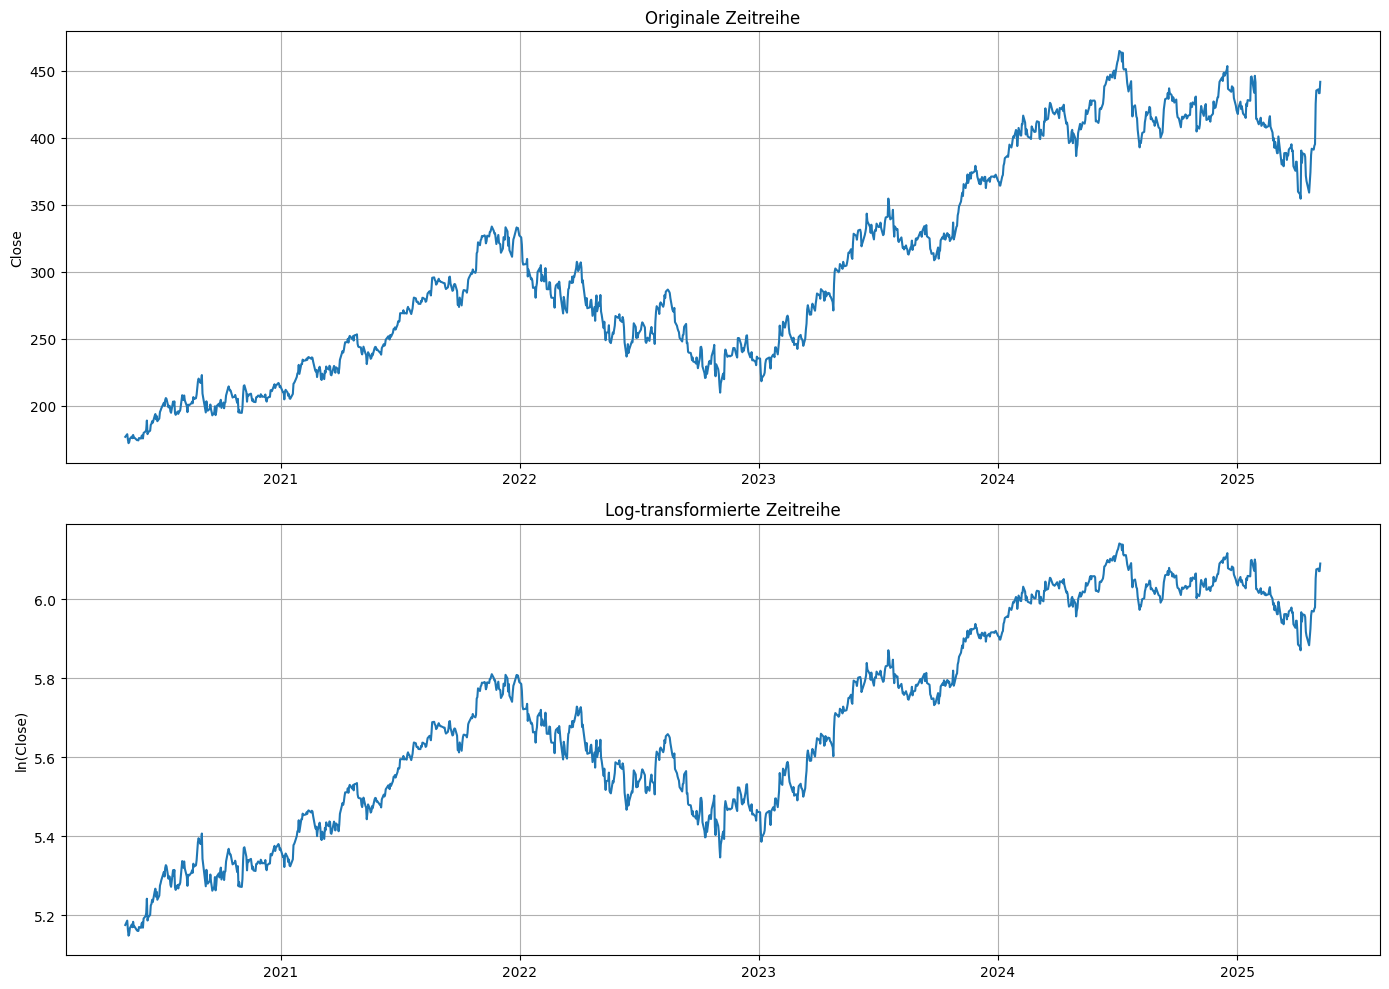


Vergleich Original vs. Log-Transformation:
- Die Log-Transformation kann die Varianz stabilisieren
- Sie kann exponentielle Trends in lineare Trends umwandeln
- Sie ist besonders nützlich für Finanzdaten, die prozentuale Änderungen betonen

--- Stationaritätstest der log-transformierten Daten ---
ADF Teststatistik: -1.4982
p-Wert: 0.5344
Kritische Werte:
   1%: -3.4356
   5%: -2.8638
   10%: -2.5680

Die log-transformierte Zeitreihe ist NICHT STATIONÄR (p-Wert > 0.05).
Empfehlung: Verwende d=1 oder d=2 in deinem ARIMA-Modell.

--- ARIMA Modell-Parameter Analyse (log-transformierte Daten) ---


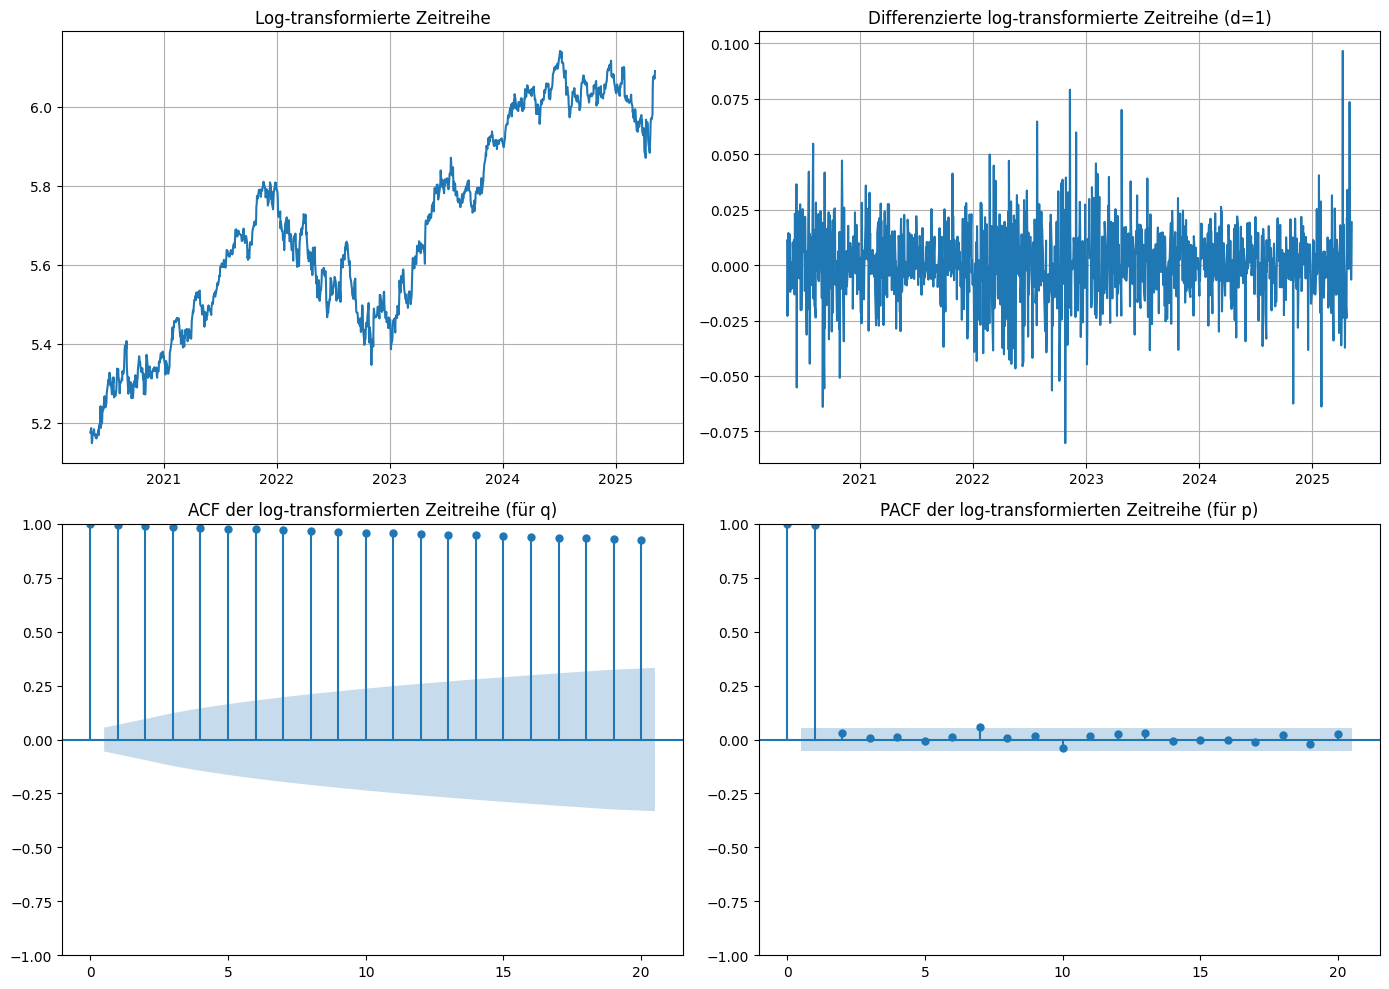


Interpretation der Plots für ARIMA(p,d,q) Parameter:
- p (AR-Term): Anzahl der signifikanten Spikes in der PACF
  → Schau, wo die PACF plötzlich nicht mehr signifikant ist (unter gestrichelte Linie fällt)
- d (Differenzierung): 0 wenn stationär, 1 oder 2 wenn nicht stationär
  → Beim ADF-Test bestimmt: d=0 für stationäre, d>0 für nicht-stationäre Daten
- q (MA-Term): Anzahl der signifikanten Spikes in der ACF
  → Schau, wo die ACF plötzlich nicht mehr signifikant ist

--- ARIMA Modellauswahl für log-transformierte Daten (Grid-Suche) ---
Teste Modelle mit p=0...2, d=0...1, q=0...2
ARIMA(0,0,1) - AIC: -1451.16, BIC: -1435.75
ARIMA(0,0,2) - AIC: -2711.85, BIC: -2691.30
ARIMA(0,1,1) - AIC: -6652.80, BIC: -6642.53
ARIMA(0,1,2) - AIC: -6653.76, BIC: -6638.35
ARIMA(1,0,0) - AIC: -6647.46, BIC: -6632.05
ARIMA(1,0,1) - AIC: -6646.82, BIC: -6626.27
ARIMA(1,0,2) - AIC: -6647.54, BIC: -6621.85
ARIMA(1,1,0) - AIC: -6652.64, BIC: -6642.37
ARIMA(1,1,1) - AIC: -6650.71, BIC: -6635.31
ARIMA(1,1,2) - A

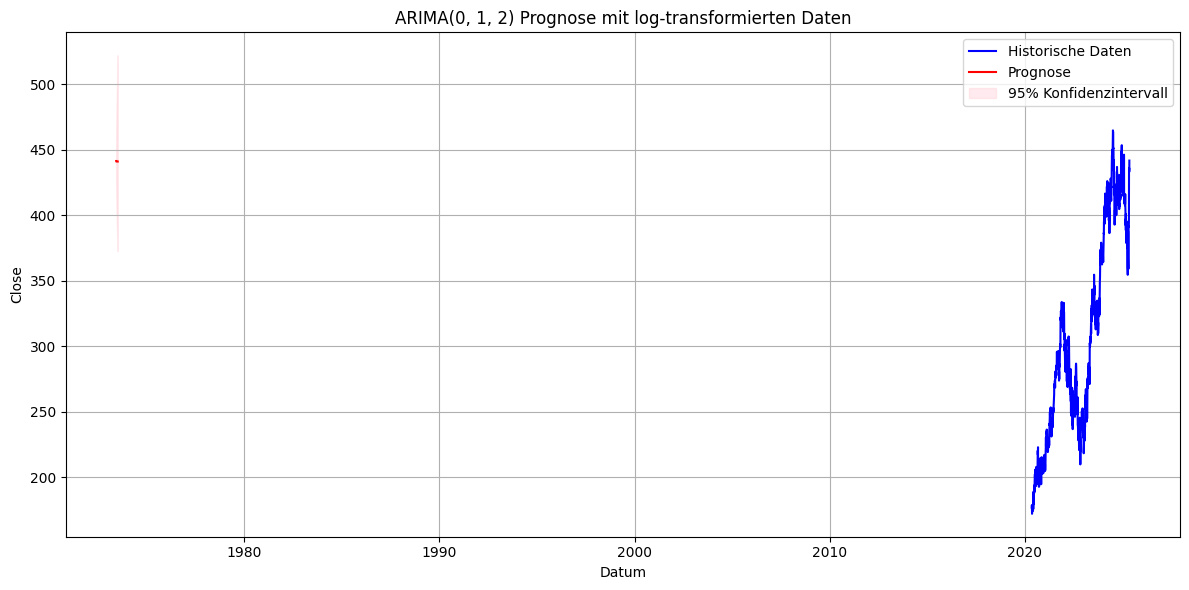

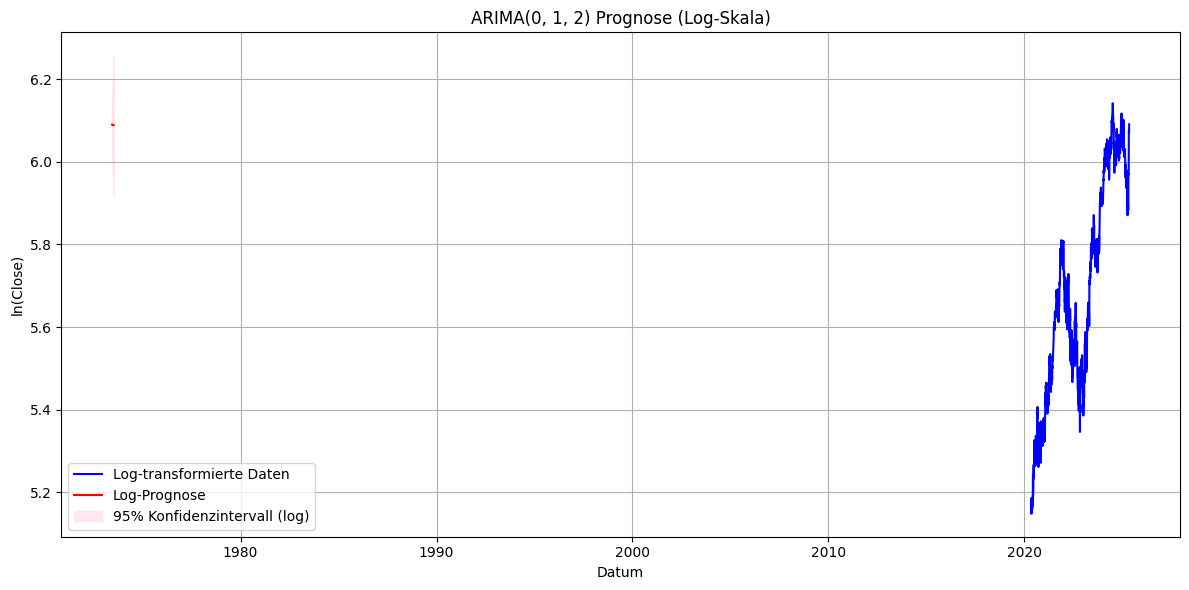


Prognose für die nächsten Zeitpunkte (zurücktransformiert):
        Prognose  Untere_Grenze  Obere_Grenze
1257  441.458966     426.931374    456.480902
1258  441.087155     421.083920    462.040626
1259  441.087155     417.217538    466.322386
1260  441.087155     413.934946    470.020422
1261  441.087155     411.039268    473.331609


In [2]:
if __name__ == "__main__":
    main()

# Neuer Code
## Test auf Stationarität
### ADF-Test

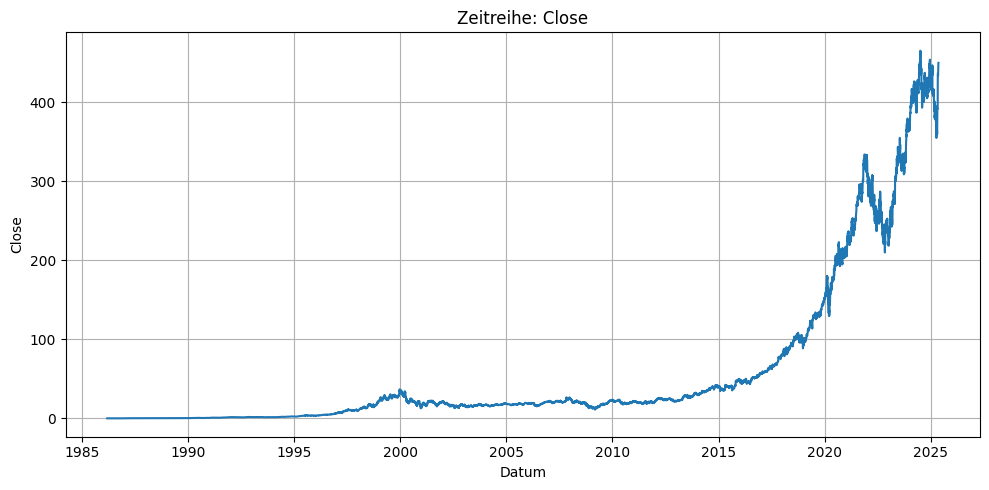

Augmented Dickey-Fuller Test für 'Close':
ADF Teststatistik: 3.9200
p-Wert: 1.0000
Kritische Werte:
   1%: -3.4310
   5%: -2.8618
   10%: -2.5669

Ergebnis: Die Zeitreihe ist NICHT STATIONÄR (p-Wert > 0.05)
Interpretation: Die Zeitreihe hat einen Einheitswurzel-Prozess.


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

def perform_adf_test(file_path, column='Close'):
    """
    Führt den Augmented Dickey-Fuller (ADF) Test durch, um die Stationarität einer Zeitreihe zu prüfen.
    
    Args:
        file_path (str): Pfad zur CSV-Datei mit den Aktiendaten
        column (str): Name der zu analysierenden Spalte (Standard: 'Close')
    
    Returns:
        bool: True wenn stationär, False wenn nicht stationär
    """
    # Daten laden
    df = pd.read_csv(file_path)
    
    # Datum als Index setzen
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'])
        df.set_index('Date', inplace=True)
    
    # Zeitreihe visualisieren
    plt.figure(figsize=(10, 5))
    plt.plot(df.index, df[column])
    plt.title(f'Zeitreihe: {column}')
    plt.xlabel('Datum')
    plt.ylabel(column)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # ADF-Test durchführen
    print(f"Augmented Dickey-Fuller Test für '{column}':")
    result = adfuller(df[column].dropna())
    
    # Ergebnisse ausgeben
    print(f"ADF Teststatistik: {result[0]:.4f}")
    print(f"p-Wert: {result[1]:.4f}")
    print("Kritische Werte:")
    for key, value in result[4].items():
        print(f"   {key}: {value:.4f}")
    
    # Entscheidung über Stationarität
    is_stationary = result[1] <= 0.05
    
    if is_stationary:
        print("\nErgebnis: Die Zeitreihe ist STATIONÄR (p-Wert <= 0.05)")
        print("Interpretation: Die Zeitreihe hat keinen Einheitswurzel-Prozess.")
    else:
        print("\nErgebnis: Die Zeitreihe ist NICHT STATIONÄR (p-Wert > 0.05)")
        print("Interpretation: Die Zeitreihe hat einen Einheitswurzel-Prozess.")
    
    return is_stationary

# Beispielaufruf
if __name__ == "__main__":
    # Passe den Pfad zur tatsächlichen CSV-Datei an
    file_path = "/Users/kaihufnagel/Documents/BBA/6. Semester/SP BBA/Menden/THWS_Reihenanalysen/data/msft_aktien_daten.csv"
    
    # ADF-Test durchführen
    is_stationary = perform_adf_test(file_path, 'Close')

### PP-Test

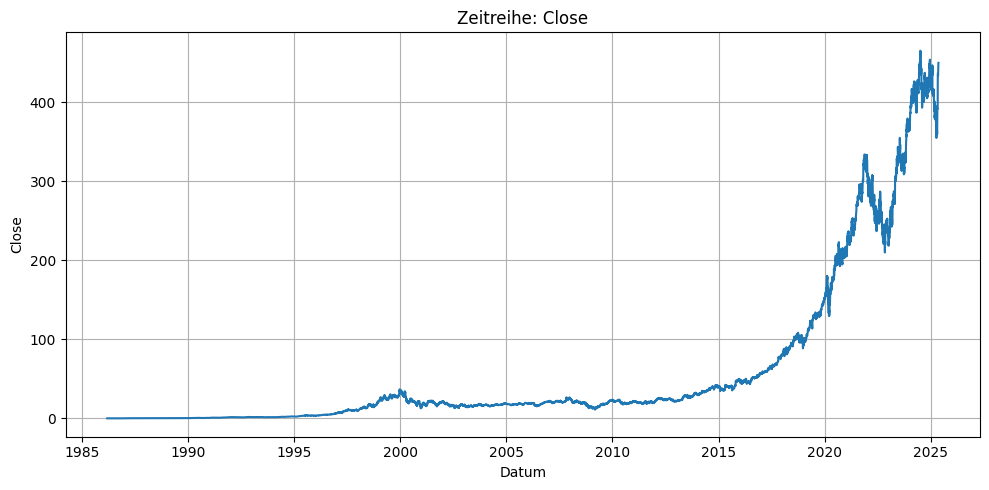

Phillips-Perron Test für 'Close':
PP Teststatistik: 3.7024
p-Wert: 1.0000
Kritische Werte:
   1%: -3.4310
   5%: -2.8618
   10%: -2.5669

Ergebnis: Die Zeitreihe ist NICHT STATIONÄR (p-Wert > 0.05)
Interpretation: Die Nullhypothese einer Einheitswurzel kann nicht abgelehnt werden.
Der PP-Test ist robuster gegenüber Heteroskedastizität als der ADF-Test.


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from arch.unitroot import PhillipsPerron

def perform_pp_test(file_path, column='Close'):
    """
    Führt den Phillips-Perron (PP) Test durch, um die Stationarität einer Zeitreihe zu prüfen.
    Verwendet das arch-Paket statt statsmodels.
    
    Args:
        file_path (str): Pfad zur CSV-Datei mit den Aktiendaten
        column (str): Name der zu analysierenden Spalte (Standard: 'Close')
    
    Returns:
        bool: True wenn stationär, False wenn nicht stationär
    """
    # Daten laden
    df = pd.read_csv(file_path)
    
    # Datum als Index setzen
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'])
        df.set_index('Date', inplace=True)
    
    # Zeitreihe visualisieren
    plt.figure(figsize=(10, 5))
    plt.plot(df.index, df[column])
    plt.title(f'Zeitreihe: {column}')
    plt.xlabel('Datum')
    plt.ylabel(column)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # PP-Test mit arch-Paket durchführen
    print(f"Phillips-Perron Test für '{column}':")
    pp_test = PhillipsPerron(df[column].dropna())
    result = pp_test.stat
    pvalue = pp_test.pvalue
    critical_values = pp_test.critical_values
    
    # Ergebnisse ausgeben
    print(f"PP Teststatistik: {result:.4f}")
    print(f"p-Wert: {pvalue:.4f}")
    print("Kritische Werte:")
    for key, value in critical_values.items():
        print(f"   {key}: {value:.4f}")
    
    # Entscheidung über Stationarität
    is_stationary = pvalue <= 0.05
    
    if is_stationary:
        print("\nErgebnis: Die Zeitreihe ist STATIONÄR (p-Wert <= 0.05)")
        print("Interpretation: Die Nullhypothese einer Einheitswurzel wird abgelehnt.")
    else:
        print("\nErgebnis: Die Zeitreihe ist NICHT STATIONÄR (p-Wert > 0.05)")
        print("Interpretation: Die Nullhypothese einer Einheitswurzel kann nicht abgelehnt werden.")
        print("Der PP-Test ist robuster gegenüber Heteroskedastizität als der ADF-Test.")
    
    return is_stationary

# Beispielaufruf
if __name__ == "__main__":
    # Passe den Pfad zur tatsächlichen CSV-Datei an
    file_path = "/Users/kaihufnagel/Documents/BBA/6. Semester/SP BBA/Menden/THWS_Reihenanalysen/data/msft_aktien_daten.csv"
    
    try:
        # PP-Test durchführen
        is_stationary = perform_pp_test(file_path, 'Close')
    except ImportError:
        print("\nFehler: Das 'arch'-Paket ist nicht installiert.")
        print("Bitte installiere es mit: pip install arch")
        print("Alternativ kannst du den ADF-Test aus statsmodels verwenden.")

### KPSS-Test

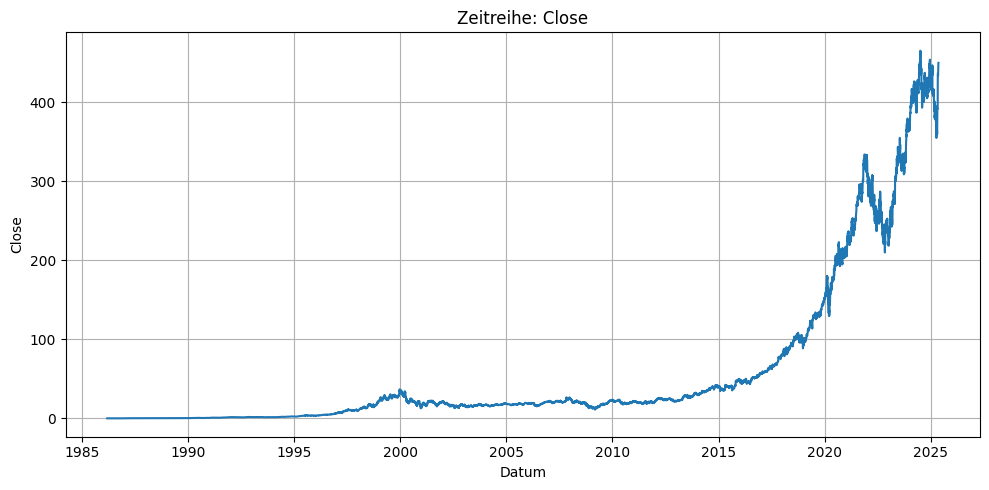

KPSS-Test für 'Close':
KPSS Teststatistik: 8.8185
p-Wert: 0.0100
Kritische Werte:
   10%: 0.3470
   5%: 0.4630
   2.5%: 0.5740
   1%: 0.7390

Ergebnis: Die Zeitreihe ist NICHT STATIONÄR (p-Wert <= 0.05)
Interpretation: Die Nullhypothese der Stationarität wird abgelehnt.

Hinweis: Der KPSS-Test hat eine umgekehrte Null-Hypothese im Vergleich zu ADF/PP:
- KPSS: Null-Hypothese ist Stationarität
- ADF/PP: Null-Hypothese ist Nicht-Stationarität (Einheitswurzel)


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import kpss

def perform_kpss_test(file_path, column='Close'):
    """
    Führt den KPSS-Test (Kwiatkowski-Phillips-Schmidt-Shin) durch, um die Stationarität einer Zeitreihe zu prüfen.
    
    Args:
        file_path (str): Pfad zur CSV-Datei mit den Aktiendaten
        column (str): Name der zu analysierenden Spalte (Standard: 'Close')
    
    Returns:
        bool: True wenn stationär, False wenn nicht stationär
    """
    # Daten laden
    df = pd.read_csv(file_path)
    
    # Datum als Index setzen
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'])
        df.set_index('Date', inplace=True)
    
    # Zeitreihe visualisieren
    plt.figure(figsize=(10, 5))
    plt.plot(df.index, df[column])
    plt.title(f'Zeitreihe: {column}')
    plt.xlabel('Datum')
    plt.ylabel(column)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # KPSS-Test durchführen
    print(f"KPSS-Test für '{column}':")
    
    # Hinweis: KPSS hat umgekehrte Null-Hypothese im Vergleich zu ADF/PP
    # Null-Hypothese: Die Zeitreihe ist stationär
    # Alternative Hypothese: Die Zeitreihe hat eine Einheitswurzel (nicht stationär)
    result = kpss(df[column].dropna(), regression='c', nlags='auto')
    
    # Ergebnisse ausgeben
    print(f"KPSS Teststatistik: {result[0]:.4f}")
    print(f"p-Wert: {result[1]:.4f}")
    print("Kritische Werte:")
    for key, value in result[3].items():
        print(f"   {key}: {value:.4f}")
    
    # WICHTIG: Bei KPSS ist die Interpretation anders als bei ADF/PP!
    # p-Wert > 0.05: Nicht genug Beweise, um die Null-Hypothese der Stationarität zu verwerfen
    # p-Wert <= 0.05: Ablehnung der Null-Hypothese, die Zeitreihe ist NICHT stationär
    is_stationary = result[1] > 0.05
    
    if is_stationary:
        print("\nErgebnis: Die Zeitreihe ist STATIONÄR (p-Wert > 0.05)")
        print("Interpretation: Die Nullhypothese der Stationarität kann nicht abgelehnt werden.")
    else:
        print("\nErgebnis: Die Zeitreihe ist NICHT STATIONÄR (p-Wert <= 0.05)")
        print("Interpretation: Die Nullhypothese der Stationarität wird abgelehnt.")
    
    print("\nHinweis: Der KPSS-Test hat eine umgekehrte Null-Hypothese im Vergleich zu ADF/PP:")
    print("- KPSS: Null-Hypothese ist Stationarität")
    print("- ADF/PP: Null-Hypothese ist Nicht-Stationarität (Einheitswurzel)")
    
    return is_stationary

# Beispielaufruf
if __name__ == "__main__":
    # Passe den Pfad zur tatsächlichen CSV-Datei an
    file_path = "/Users/kaihufnagel/Documents/BBA/6. Semester/SP BBA/Menden/THWS_Reihenanalysen/data/msft_aktien_daten.csv"
    
    # KPSS-Test durchführen
    is_stationary = perform_kpss_test(file_path, 'Close')

## Log. Differenzierung

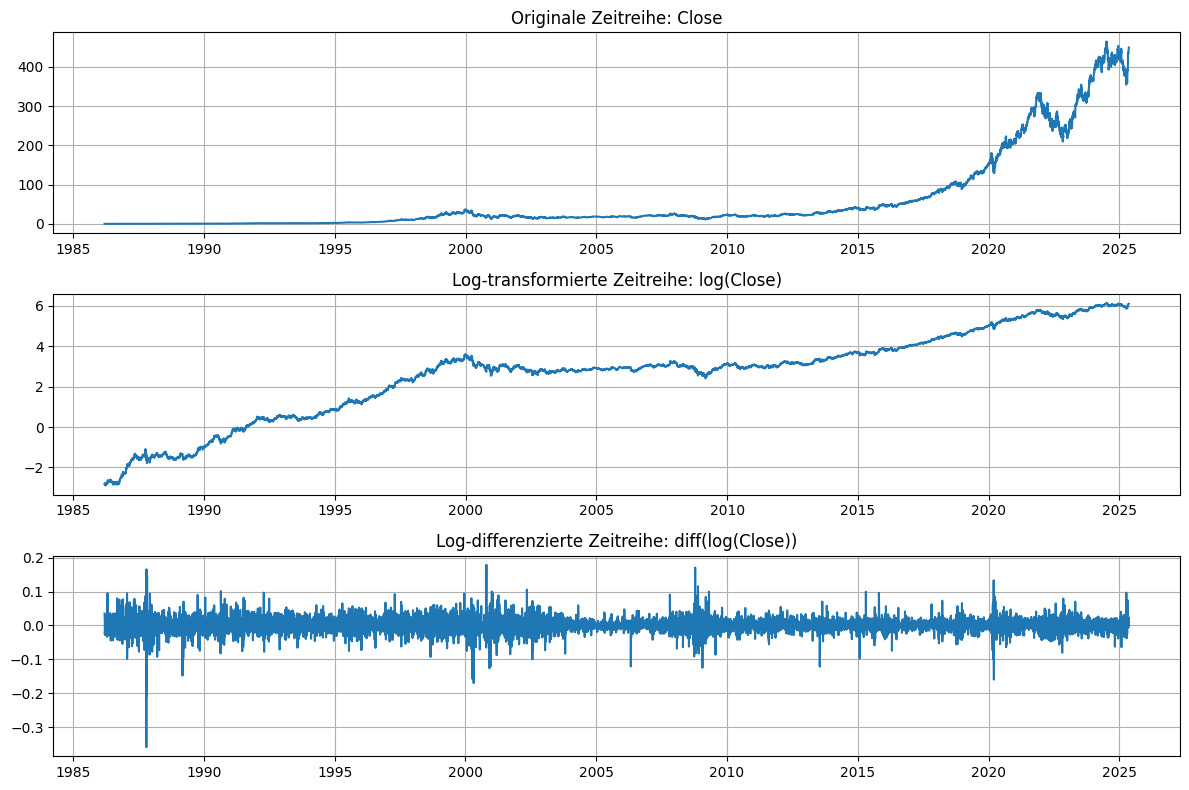


Log-differenzierte Daten wurden gespeichert unter: /Users/kaihufnagel/Documents/BBA/6. Semester/SP BBA/Menden/THWS_Reihenanalysen/data/msft_aktien_daten_log_diff.csv

Log-differenzierte Zeitreihe für 'Close':
Anzahl der Datenpunkte: 9868
Erster Wert: 0.035089 (am 1986-03-14)
Letzter Wert: 0.000579 (am 2025-05-13)
Minimum: -0.358332
Maximum: 0.178692
Mittelwert: 0.000905
Standardabweichung: 0.021092

Hinweis: Die log-differenzierte Zeitreihe entspricht den täglichen logarithmischen Renditen.

--- ADF-Test für die log-differenzierte Zeitreihe ---
ADF Teststatistik: -53.3098
p-Wert: 0.0000
Kritische Werte:
   1%: -3.4310
   5%: -2.8618
   10%: -2.5669

Ergebnis ADF: Die log-differenzierte Zeitreihe ist STATIONÄR (p-Wert <= 0.05)

--- KPSS-Test für die log-differenzierte Zeitreihe ---
KPSS Teststatistik: 0.4881
p-Wert: 0.0444
Kritische Werte:
   10%: 0.3470
   5%: 0.4630
   2.5%: 0.5740
   1%: 0.7390

Ergebnis KPSS: Die log-differenzierte Zeitreihe ist NICHT STATIONÄR (p-Wert <= 0.05)


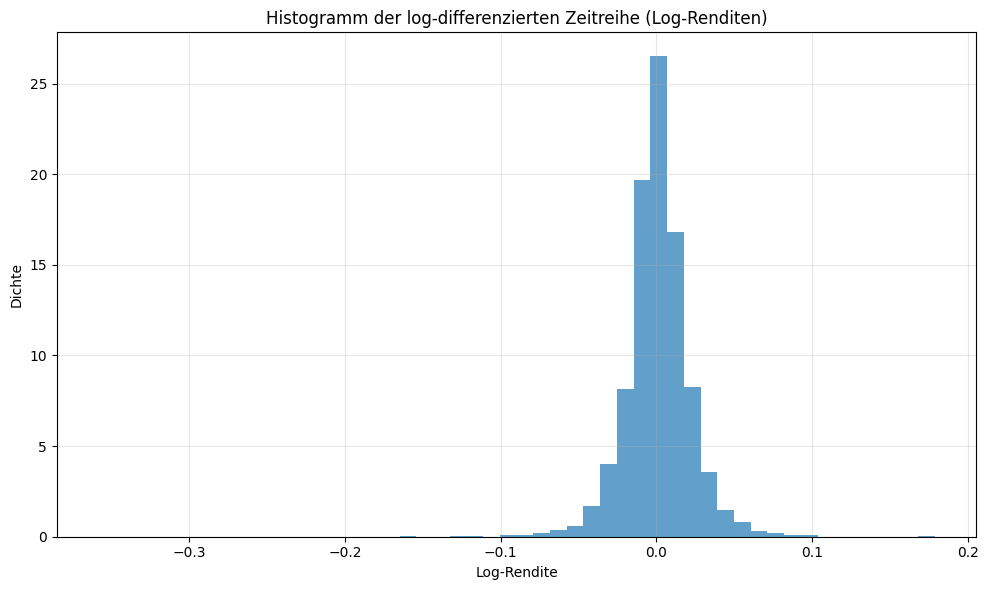


Fazit:
Die log-differenzierte Zeitreihe (auch bekannt als logarithmische Rendite)
ist eine gängige Transformation für Aktienkursdaten, die typischerweise zu
einer stationären Zeitreihe führt und für ARIMA-Modellierung verwendet werden kann.

Die transformierten Daten wurden gespeichert und können für weitere Analysen verwendet werden.
CSV-Datei: /Users/kaihufnagel/Documents/BBA/6. Semester/SP BBA/Menden/THWS_Reihenanalysen/data/msft_aktien_daten_log_diff.csv


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from statsmodels.tsa.stattools import adfuller, kpss

def log_diff_transformation(file_path, column='Close', save_csv=True):
    """
    Führt eine logarithmische Differenzierung auf der Zeitreihe durch, überprüft deren Stationarität
    und speichert die transformierte Zeitreihe als CSV-Datei.
    
    Args:
        file_path (str): Pfad zur CSV-Datei mit den Aktiendaten
        column (str): Name der zu analysierenden Spalte (Standard: 'Close')
        save_csv (bool): Wenn True, wird die transformierte Zeitreihe als CSV gespeichert
    
    Returns:
        pandas.DataFrame: DataFrame mit der log-differenzierten Zeitreihe
        str: Pfad zur gespeicherten CSV-Datei (wenn save_csv=True)
    """
    # Daten laden
    df = pd.read_csv(file_path)
    
    # Datum als Index setzen
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'])
        df.set_index('Date', inplace=True)
    
    # 1. Originale Zeitreihe visualisieren
    plt.figure(figsize=(12, 8))
    
    plt.subplot(3, 1, 1)
    plt.plot(df.index, df[column])
    plt.title(f'Originale Zeitreihe: {column}')
    plt.grid(True)
    
    # 2. Log-Transformation
    log_series = np.log(df[column])
    plt.subplot(3, 1, 2)
    plt.plot(df.index, log_series)
    plt.title(f'Log-transformierte Zeitreihe: log({column})')
    plt.grid(True)
    
    # 3. Log-Differenzierung
    log_diff_series = log_series.diff().dropna()
    
    plt.subplot(3, 1, 3)
    plt.plot(log_diff_series.index, log_diff_series)
    plt.title(f'Log-differenzierte Zeitreihe: diff(log({column}))')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    # Erstelle ein DataFrame mit allen relevanten Daten
    result_df = pd.DataFrame({
        'Original': df[column],
        'Log': log_series,
        'Log_Diff': np.nan  # Zunächst mit NaN füllen
    })
    
    # Log_Diff korrekt einsetzen (ein Datenpunkt weniger als die anderen Serien)
    result_df.loc[log_diff_series.index, 'Log_Diff'] = log_diff_series
    
    # CSV-Datei speichern
    output_path = None
    if save_csv:
        # Erstelle Dateinamen basierend auf dem ursprünglichen Dateinamen
        base_name = os.path.basename(file_path)
        name_without_ext = os.path.splitext(base_name)[0]
        output_dir = os.path.dirname(file_path)
        
        # Neuer Dateiname mit _log_diff Suffix
        output_path = os.path.join(output_dir, f"{name_without_ext}_log_diff.csv")
        
        # Speichern
        result_df.to_csv(output_path)
        print(f"\nLog-differenzierte Daten wurden gespeichert unter: {output_path}")
    
    print(f"\nLog-differenzierte Zeitreihe für '{column}':")
    print(f"Anzahl der Datenpunkte: {log_diff_series.count()}")
    print(f"Erster Wert: {log_diff_series.iloc[0]:.6f} (am {log_diff_series.index[0].date()})")
    print(f"Letzter Wert: {log_diff_series.iloc[-1]:.6f} (am {log_diff_series.index[-1].date()})")
    print(f"Minimum: {log_diff_series.min():.6f}")
    print(f"Maximum: {log_diff_series.max():.6f}")
    print(f"Mittelwert: {log_diff_series.mean():.6f}")
    print(f"Standardabweichung: {log_diff_series.std():.6f}")
    
    # Diese Transformation entspricht den logarithmischen Renditen
    print("\nHinweis: Die log-differenzierte Zeitreihe entspricht den täglichen logarithmischen Renditen.")
    
    # ADF-Test für die log-differenzierte Zeitreihe
    print("\n--- ADF-Test für die log-differenzierte Zeitreihe ---")
    adf_result = adfuller(log_diff_series.dropna())
    
    print(f"ADF Teststatistik: {adf_result[0]:.4f}")
    print(f"p-Wert: {adf_result[1]:.4f}")
    print("Kritische Werte:")
    for key, value in adf_result[4].items():
        print(f"   {key}: {value:.4f}")
    
    adf_stationary = adf_result[1] <= 0.05
    
    if adf_stationary:
        print("\nErgebnis ADF: Die log-differenzierte Zeitreihe ist STATIONÄR (p-Wert <= 0.05)")
    else:
        print("\nErgebnis ADF: Die log-differenzierte Zeitreihe ist NICHT STATIONÄR (p-Wert > 0.05)")
    
    # KPSS-Test für die log-differenzierte Zeitreihe
    print("\n--- KPSS-Test für die log-differenzierte Zeitreihe ---")
    kpss_result = kpss(log_diff_series.dropna(), regression='c', nlags='auto')
    
    print(f"KPSS Teststatistik: {kpss_result[0]:.4f}")
    print(f"p-Wert: {kpss_result[1]:.4f}")
    print("Kritische Werte:")
    for key, value in kpss_result[3].items():
        print(f"   {key}: {value:.4f}")
    
    kpss_stationary = kpss_result[1] > 0.05
    
    if kpss_stationary:
        print("\nErgebnis KPSS: Die log-differenzierte Zeitreihe ist STATIONÄR (p-Wert > 0.05)")
    else:
        print("\nErgebnis KPSS: Die log-differenzierte Zeitreihe ist NICHT STATIONÄR (p-Wert <= 0.05)")
    
    # Histogramm der log-differenzierten Zeitreihe
    plt.figure(figsize=(10, 6))
    plt.hist(log_diff_series, bins=50, alpha=0.7, density=True)
    plt.title('Histogramm der log-differenzierten Zeitreihe (Log-Renditen)')
    plt.xlabel('Log-Rendite')
    plt.ylabel('Dichte')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    return result_df, output_path if save_csv else None

# Beispielaufruf
if __name__ == "__main__":
    # Passe den Pfad zur tatsächlichen CSV-Datei an
    file_path = "/Users/kaihufnagel/Documents/BBA/6. Semester/SP BBA/Menden/THWS_Reihenanalysen/data/msft_aktien_daten.csv"
    
    # Log-Differenzierung durchführen, Stationarität testen und als CSV speichern
    result_df, saved_path = log_diff_transformation(file_path, 'Close', save_csv=True)
    
    print("\nFazit:")
    print("Die log-differenzierte Zeitreihe (auch bekannt als logarithmische Rendite)")
    print("ist eine gängige Transformation für Aktienkursdaten, die typischerweise zu")
    print("einer stationären Zeitreihe führt und für ARIMA-Modellierung verwendet werden kann.")
    
    if saved_path:
        print(f"\nDie transformierten Daten wurden gespeichert und können für weitere Analysen verwendet werden.")
        print(f"CSV-Datei: {saved_path}")

## ACF & PACF für log. differenzierte Zeitreihe

Lade log-differenzierte Daten aus: /Users/kaihufnagel/Documents/BBA/6. Semester/SP BBA/Menden/THWS_Reihenanalysen/data/msft_aktien_daten_log_diff.csv
Verwende vorhandene 'Log_Diff' Spalte.


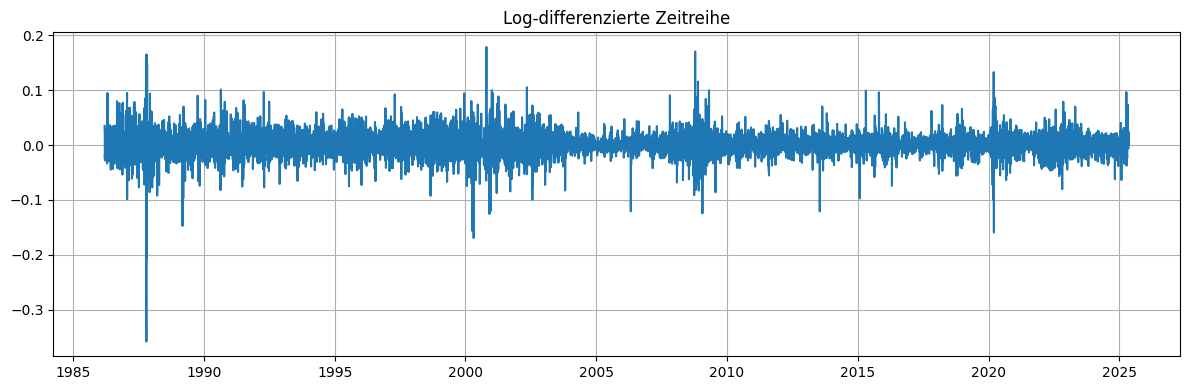

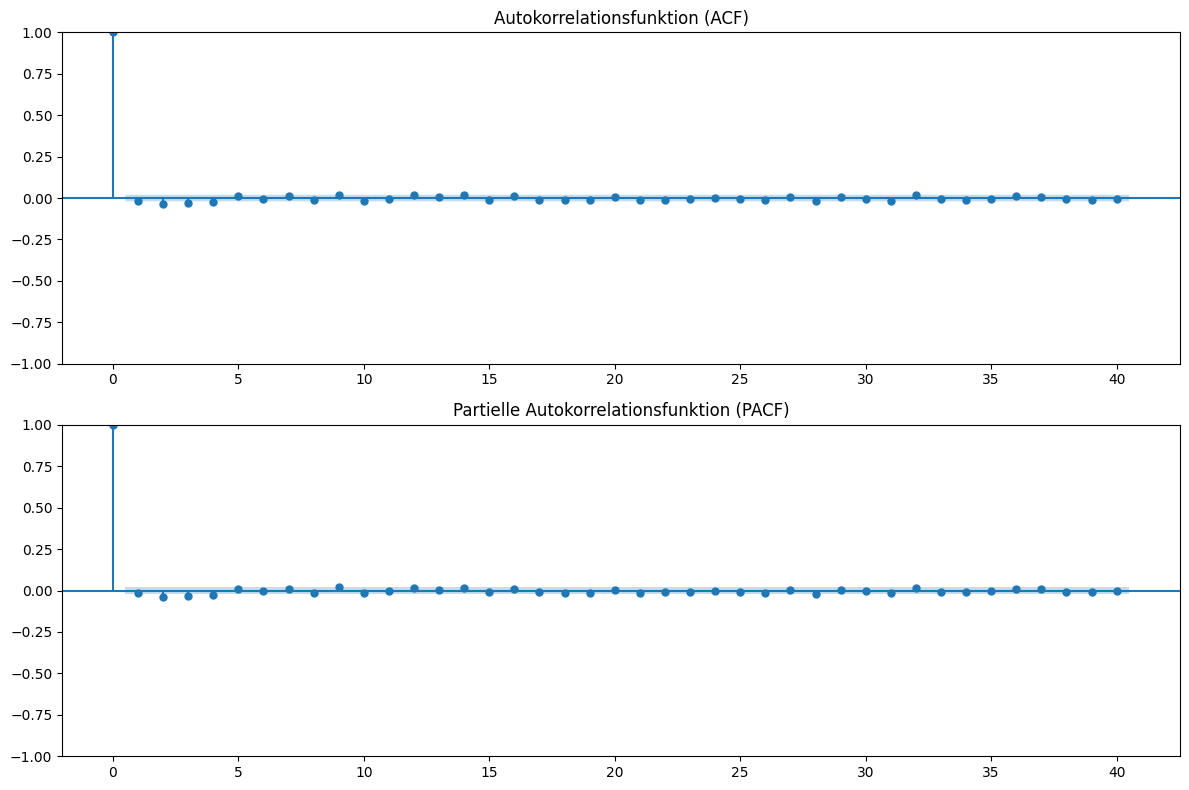


Interpretation der ACF/PACF-Plots für ARIMA-Modellierung:

1. Identifizierte signifikante Lags:
   ACF: [2, 3, 4]
   PACF: [2, 3, 4]

2. ARIMA-Parameter-Empfehlungen basierend auf ACF/PACF:
   Sowohl ACF als auch PACF zeigen signifikante Spikes.
   Dies deutet auf einen gemischten ARMA-Prozess hin.
   Mögliche Modelle: ARIMA(4,0,4)
   Es wird empfohlen, verschiedene Kombinationen von p und q zu testen.

3. Hinweise zur Stationarität:
   Die ACF zeigt keine Anzeichen für Nicht-Stationarität.
   Der verwendete Differenzierungsgrad (d=1 für log-differenzierte Daten) scheint angemessen.

4. Für ARIMA-Modellierung:
   p: Anzahl der AR-Terme (aus signifikanten PACF-Lags)
   d: Differenzierungsgrad (bereits 1 durch log-Differenzierung)
   q: Anzahl der MA-Terme (aus signifikanten ACF-Lags)

5. Empfohlene Modelle zum Testen:
   ARIMA(0,1,2)
   ARIMA(0,1,3)
   ARIMA(0,1,4)
   ARIMA(2,1,0)
   ARIMA(2,1,2)
   ARIMA(2,1,3)
   ARIMA(2,1,4)
   ARIMA(3,1,0)
   ARIMA(3,1,2)
   ARIMA(3,1,3)
   ARIMA(3

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
import os

def analyze_acf_pacf_log_diff(file_path, column='Close', max_lags=40):
    """
    Berechnet und visualisiert die Autokorrelationsfunktion (ACF) und die partielle Autokorrelationsfunktion (PACF)
    für einen log-differenzierten Datensatz.
    
    Args:
        file_path (str): Pfad zur CSV-Datei mit den Aktiendaten
        column (str): Name der zu analysierenden Spalte (Standard: 'Close')
        max_lags (int): Maximale Anzahl der Lags für ACF und PACF
    
    Returns:
        tuple: (acf_values, pacf_values) - Die berechneten ACF- und PACF-Werte
    """
    # Prüfen, ob es sich um eine log-differenzierte CSV handelt
    base_name = os.path.basename(file_path)
    
    if '_log_diff.csv' in base_name:
        # Es handelt sich bereits um eine log-differenzierte Datei
        print(f"Lade log-differenzierte Daten aus: {file_path}")
        df = pd.read_csv(file_path)
        
        # Datum als Index setzen
        if 'Date' in df.columns:
            df['Date'] = pd.to_datetime(df['Date'])
            df.set_index('Date', inplace=True)
        
        # Versuche, 'Log_Diff' Spalte zu finden
        if 'Log_Diff' in df.columns:
            log_diff_series = df['Log_Diff'].dropna()
            print("Verwende vorhandene 'Log_Diff' Spalte.")
        else:
            # Alternativ die angegebene Spalte verwenden
            log_diff_series = df[column].dropna()
            print(f"Verwende Spalte '{column}' als log-differenzierte Daten.")
    else:
        # Es handelt sich um eine normale CSV - log-differenzierung muss durchgeführt werden
        print(f"Lade Originaldaten aus: {file_path}")
        print(f"Führe Log-Differenzierung für Spalte '{column}' durch...")
        
        df = pd.read_csv(file_path)
        
        # Datum als Index setzen
        if 'Date' in df.columns:
            df['Date'] = pd.to_datetime(df['Date'])
            df.set_index('Date', inplace=True)
        
        # Log-Differenzierung durchführen
        log_series = np.log(df[column])
        log_diff_series = log_series.diff().dropna()
        print("Log-Differenzierung abgeschlossen.")
    
    # Überprüfe, ob genügend Daten vorhanden sind
    if len(log_diff_series) < max_lags + 1:
        print(f"WARNUNG: Die Zeitreihe enthält nur {len(log_diff_series)} Datenpunkte, was weniger als max_lags+1 ({max_lags+1}) ist.")
        print("Die ACF/PACF-Berechnung könnte unzuverlässig sein.")
        max_lags = len(log_diff_series) // 2  # Reduziere max_lags auf die Hälfte der Datenpunkte
        print(f"Reduziere max_lags auf {max_lags}.")
    
    # Daten visualisieren
    plt.figure(figsize=(12, 4))
    plt.plot(log_diff_series.index, log_diff_series)
    plt.title('Log-differenzierte Zeitreihe')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # ACF und PACF berechnen
    acf_values = acf(log_diff_series, nlags=max_lags)
    pacf_values = pacf(log_diff_series, nlags=max_lags)
    
    # ACF und PACF visualisieren
    plt.figure(figsize=(12, 8))
    
    # ACF Plot
    plt.subplot(2, 1, 1)
    plot_acf(log_diff_series, lags=max_lags, ax=plt.gca())
    plt.title('Autokorrelationsfunktion (ACF)')
    
    # PACF Plot
    plt.subplot(2, 1, 2)
    plot_pacf(log_diff_series, lags=max_lags, ax=plt.gca())
    plt.title('Partielle Autokorrelationsfunktion (PACF)')
    
    plt.tight_layout()
    plt.show()
    
    # Statistisch signifikante Lags identifizieren
    # Konfidenzintervall: 95% = 1.96/sqrt(N)
    conf_level = 1.96 / np.sqrt(len(log_diff_series))
    
    # ACF signifikante Lags
    significant_acf_lags = [i for i, val in enumerate(acf_values) if abs(val) > conf_level and i > 0]
    
    # PACF signifikante Lags
    significant_pacf_lags = [i for i, val in enumerate(pacf_values) if abs(val) > conf_level and i > 0]
    
    print("\nInterpretation der ACF/PACF-Plots für ARIMA-Modellierung:")
    print("=" * 60)
    
    # Grundlegende Interpretation
    print("\n1. Identifizierte signifikante Lags:")
    print(f"   ACF: {significant_acf_lags}")
    print(f"   PACF: {significant_pacf_lags}")
    
    print("\n2. ARIMA-Parameter-Empfehlungen basierend auf ACF/PACF:")
    
    # Überprüfe ACF und PACF auf typische Muster
    if not significant_acf_lags and not significant_pacf_lags:
        print("   Kein signifikantes Muster erkannt. Die Zeitreihe scheint weißes Rauschen zu sein.")
        print("   Empfohlenes Modell: ARIMA(0,0,0) oder einfacheres Modell wie Mittelwert oder Zufallsfaktor.")
    
    elif not significant_acf_lags and significant_pacf_lags:
        max_p = max(significant_pacf_lags)
        print(f"   ACF fällt ab, PACF hat signifikante Spikes bis Lag {max_p}.")
        print(f"   Empfohlenes Modell: ARIMA({max_p},0,0) - AR({max_p}) Prozess.")
    
    elif significant_acf_lags and not significant_pacf_lags:
        max_q = max(significant_acf_lags)
        print(f"   ACF hat signifikante Spikes bis Lag {max_q}, PACF fällt ab.")
        print(f"   Empfohlenes Modell: ARIMA(0,0,{max_q}) - MA({max_q}) Prozess.")
    
    else:
        print("   Sowohl ACF als auch PACF zeigen signifikante Spikes.")
        print("   Dies deutet auf einen gemischten ARMA-Prozess hin.")
        print(f"   Mögliche Modelle: ARIMA({max(significant_pacf_lags)},0,{max(significant_acf_lags)})")
        print("   Es wird empfohlen, verschiedene Kombinationen von p und q zu testen.")
    
    print("\n3. Hinweise zur Stationarität:")
    
    # Überprüfung auf langsames Abklingen der ACF (Nicht-Stationarität)
    if all(val > 0 for val in acf_values[:10]):
        if acf_values[10] > 0.3:  # Ein Schwellenwert für langsames Abklingen
            print("   Die ACF klingt langsam ab, was auf eine nicht-stationäre Zeitreihe hindeuten könnte.")
            print("   Erhöhe den Differenzierungsgrad (d) auf 1 oder 2.")
    else:
        print("   Die ACF zeigt keine Anzeichen für Nicht-Stationarität.")
        print("   Der verwendete Differenzierungsgrad (d=1 für log-differenzierte Daten) scheint angemessen.")
    
    print("\n4. Für ARIMA-Modellierung:")
    print("   p: Anzahl der AR-Terme (aus signifikanten PACF-Lags)")
    print("   d: Differenzierungsgrad (bereits 1 durch log-Differenzierung)")
    print("   q: Anzahl der MA-Terme (aus signifikanten ACF-Lags)")
    
    # Empfehlung von Modellparametern
    p_options = [0] + sorted(significant_pacf_lags[:3]) if significant_pacf_lags else [0, 1, 2]
    q_options = [0] + sorted(significant_acf_lags[:3]) if significant_acf_lags else [0, 1, 2]
    
    print("\n5. Empfohlene Modelle zum Testen:")
    for p in p_options:
        for q in q_options:
            if p == 0 and q == 0:
                continue  # Überspringe das triviale Modell
            print(f"   ARIMA({p},1,{q})")
    
    return acf_values, pacf_values

# Beispielaufruf
if __name__ == "__main__":
    # Passe den Pfad zur tatsächlichen CSV-Datei an
    # Dies kann entweder eine reguläre Aktien-CSV oder eine bereits log-differenzierte CSV sein
    file_path = "/Users/kaihufnagel/Documents/BBA/6. Semester/SP BBA/Menden/THWS_Reihenanalysen/data/msft_aktien_daten_log_diff.csv" 
    
    # ACF und PACF analysieren
    acf_values, pacf_values = analyze_acf_pacf_log_diff(file_path, 'Close', max_lags=40)